In [161]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, laplace, cauchy, expon, uniform

ImportError: cannot import name 'ecdf' from 'scipy.stats' (/home/shmalex/anaconda3/lib/python3.7/site-packages/scipy/stats/__init__.py)

# 1. Chi-squared Goodness of Fit Testing for a Gaussian Distribution


Вспомним что мы применяли $\chi^2$ только для дискретных распределений.

# 2 KS and KL Tests

S = {0.28, 0.2, 0.01, 0.8, 0.1}

In [284]:
# data sorted
s = [0.28, 0.2, 0.01, 0.8, 0.1]
s = np.sort(s)
s

array([0.01, 0.1 , 0.2 , 0.28, 0.8 ])

In [286]:
cdf = np.cumsum(np.ones((len(s),))/len(s))
cdf

array([0.2, 0.4, 0.6, 0.8, 1. ])

In [287]:
def f_n(t,x_i):
    return 1/len(s) * np.sum(x_i<t)

In [288]:
n = 100
ucdf = [f_n(i,s)for i in np.linspace(0,1,n)]
unif = np.linspace(0,1,n)

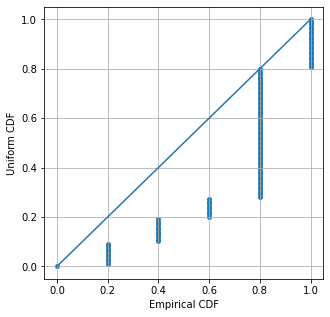

In [289]:
plt.figure(figsize=(5,5))
plt.plot([0,1],[0,1])
plt.scatter(ucdf, unif, s=15)
plt.ylabel('Uniform CDF')
plt.xlabel('Empirical CDF')
plt.grid(True)
plt.show()

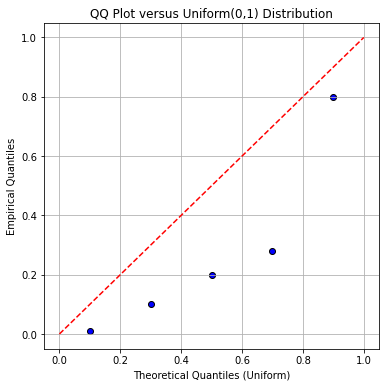

In [290]:
import numpy as np
import matplotlib.pyplot as plt

# Your data
s = [0.28, 0.2, 0.01, 0.8, 0.1]

# Step 1: Sort the data
s_sorted = np.sort(s)

# Step 2: Generate uniform quantiles
n = len(s_sorted)
uniform_quantiles = np.array([(i - 0.5) / n for i in range(1, n + 1)])

# Step 3: Create QQ plot
plt.figure(figsize=(6, 6))
plt.scatter(uniform_quantiles, s_sorted, color='blue', edgecolor='k')
plt.plot([0, 1], [0, 1], 'r--')  # Line Y=X for reference
plt.xlabel('Theoretical Quantiles (Uniform)')
plt.ylabel('Empirical Quantiles')
plt.title('QQ Plot versus Uniform(0,1) Distribution')
plt.grid(True)
plt.show()

In [291]:
uniform_quantiles

array([0.1, 0.3, 0.5, 0.7, 0.9])

In [296]:
# Your data
s = [0.28, 0.2, 0.01, 0.8, 0.1]

# Step 1: Sort the data
s_sorted = sorted(s)

# Step 2 & 3: Calculate the maximum difference between the ECDF and the uniform CDF
n = len(s_sorted)
ks_statistic = max(max(abs((i - 1) / n - x), abs(i / n - x)) for i, x in enumerate(s_sorted, start=1))

print(f"Kolmogorov-Smirnov Statistic: {ks_statistic:.4f}")

Kolmogorov-Smirnov Statistic: 0.5200


In [293]:
import numpy as np
from scipy.stats import kstest, k

# Your data
s = [0.28, 0.2, 0.01, 0.8, 0.1]

# Perform the Kolmogorov-Smirnov test against a uniform distribution
ks_statistic, p_value = kstest(s, 'uniform')

# Print the results
print("KS Statistic:", ks_statistic)
print("P-value:", p_value)

KS Statistic: 0.52
P-value: 0.08782172159999999


In [294]:
s = [0.28, 0.2, 0.01, 0.8, 0.1]

# Calculate the sample mean
sample_mean = np.mean(s)
sample_mean

0.278

In [295]:
# Calculate the sample variance
sample_variance = np.var(s, ddof=1)
sample_variance


0.09552000000000001

In [298]:
import numpy as np
from scipy.stats import kstest

def lilliefors_uniform_test(data):
    # Convert data to a NumPy array for element-wise operations
    data = np.array(data)
    
    # Estimate parameters of uniform distribution
    min_val = np.min(data)
    max_val = np.max(data)
    
    # Standardize data to a uniform distribution U(0, 1)
    standardized_data = (data - min_val) / (max_val - min_val)
    
    # Perform K-S test against a uniform distribution U(0, 1)
    statistic, p_value = kstest(standardized_data, 'uniform')
    
    return statistic, p_value

# Your data
s = [0.28, 0.2, 0.01, 0.8, 0.1]

# Perform the Lilliefors-like test for the uniform distribution
statistic, p_value = lilliefors_uniform_test(s)
print(f"Lilliefors-like Test Statistic for Uniform Distribution: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")


Lilliefors-like Test Statistic for Uniform Distribution: 0.4582
P-value: 0.1783


In [300]:
# !pip install statsmodels
import numpy as np
from statsmodels.stats.diagnostic import lilliefors

# Your data
s = [0.28, 0.2, 0.01, 0.8, 0.1]

# Perform the Kolmogorov-Lilliefors test for normality
statistic, p_value = lilliefors(s, dist='norm')

print(f"Lilliefors Test Statistic: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")

Lilliefors Test Statistic: 0.2974
P-value: 0.1783


## KS Test Statistic

In this problem, you will test the null and alternative hypotheses

# 3 QQ Plots

## Normal

In [146]:
n = 1000
el = np.linspace(1,1000,1000)
probs = el/n

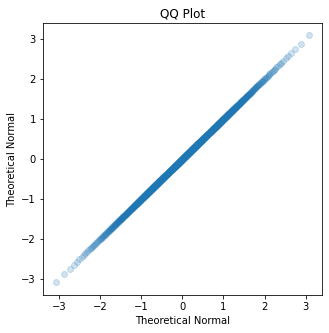

In [147]:
norm_x = norm_rv.ppf(probs)
norm_y = norm_rv.ppf(probs)
plt.figure(figsize=(5,5))
plt.scatter(norm_x,norm_y, alpha=0.2)
plt.xlabel('Theoretical Normal')
plt.ylabel('Theoretical Normal')
plt.title('QQ Plot')
plt.show()

## Cauchy

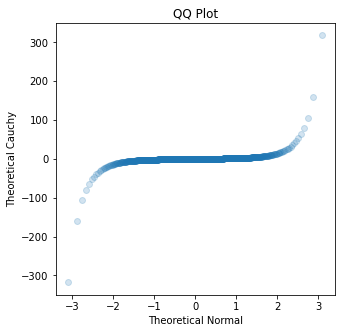

In [148]:
cauc_x = cauchy.ppf(probs)
plt.figure(figsize=(5,5))
plt.scatter(norm_x,cauc_x, alpha=0.2)
plt.xlabel('Theoretical Normal')
plt.ylabel('Theoretical Cauchy')
plt.title('QQ Plot')
plt.show()

## Shifted Exponential

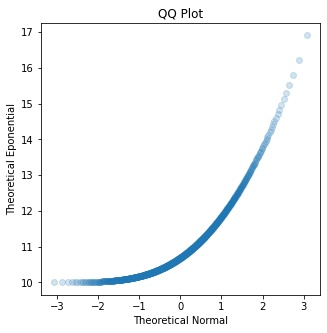

In [156]:
exp_rv = expon(loc=2.5)
exp_x = exp_rv.ppf(probs)+7.5
plt.figure(figsize=(5,5))
plt.scatter(norm_x,exp_x, alpha=0.2)
plt.xlabel('Theoretical Normal')
plt.ylabel('Theoretical Eponential')
plt.title('QQ Plot')
plt.show()

## Uniform

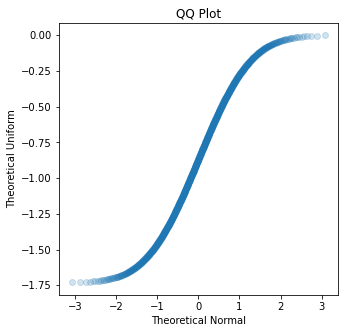

In [158]:
uni_rv = uniform(loc=-np.sqrt(3), scale=np.sqrt(3))
uni_x = uni_rv.ppf(probs)
plt.figure(figsize=(5,5))
plt.scatter(norm_x, uni_x, alpha=0.2)
plt.xlabel('Theoretical Normal')
plt.ylabel('Theoretical Uniform')
plt.title('QQ Plot')
plt.show()

## Laplace

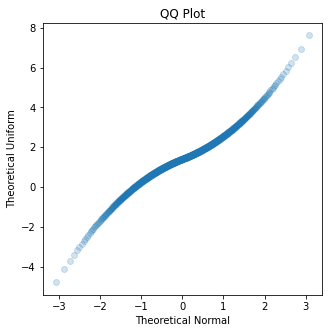

In [159]:
lap_rv = laplace(loc=np.sqrt(2))
lap_x = lap_rv.ppf(probs)
plt.figure(figsize=(5,5))
plt.scatter(norm_x, lap_x, alpha=0.2)
plt.xlabel('Theoretical Normal')
plt.ylabel('Theoretical Uniform')
plt.title('QQ Plot')
plt.show()

# 4. Are Selected Jurors Representative of the Population?

In lecture you saw the following data:


| Race | White | Black | Hispanic | Other | Total | 
|:----:|:----:|:----:|:----:|:----:|:----:|
| # Jurors | 205 | 26 | 25 | 19 | 275 |
| Proportion in county | 0.72 | 0.07 | 0.12 | 0.09 | 1 |

First row: Number of jurors by race, totalling 275
Second row: Proportion of population in a particular county in US by race, totaling 1

Design a $\chi^2$ test to see whether or not the jurors selected are representative of the population in the county. Denote by $T_n$ the test statistic for this test.

What is the number of degrees of freedom of the asymptotic distribution of $T_n$. In other words,
$$\displaystyle  \displaystyle T_ n\xrightarrow [n\to \infty ]{(d)}\chi ^2_{\ell }$$

for  $\ell=$ ?

Evaluate $T_{275}$ on the given data set. (Answer accurate to 2 decimal places. )

$T_{275}=?$

What is the $p$-value of this test?
(Answer accurate to 2 decimal places.)

You could use this tool or software such as R to find the quantiles of a chi-squared distribution.)

# Links

https://shiny.rit.albany.edu/stat/chisq/